In [4]:
import sys
sys.path.append('../src/')
from tqdm import tqdm
import pandas as pd
import wandb
import asyncio
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


In [6]:

api = wandb.Api()
entity, project = "ajzero", "AlphaZero"
x_metric = "puct_c"
tags = [x_metric]
filters = {"tags": {"$in": tags}}
runs = api.runs(entity + "/" + project, filters=filters)
runs

<Runs ajzero/AlphaZero>

In [7]:
# crete a dataframe from runs and summary metrics

data = []
for run in tqdm(runs):
    summary = run.summary._json_dict
    config = run.config
    summary.update(config)
    data.append(summary)

df = pd.DataFrame(data)

df


100%|██████████| 45/45 [00:00<00:00, 17469.80it/s]


,_runtime,_timestamp,Self_Play/Rewards,Training/Regularization_loss,Training/Value_and_Policy_loss,_step,Self_Play/Mean_Reward,Self_Play/Mean_Timesteps,Training/Replay_Buffer_Size,max_Self_Play/Mean_Reward_step,...,expansion_policy,n_steps_learning,selection_policy,value_loss_weight,max_episode_length,policy_loss_weight,sample_batch_ratio,regularization_weight,tree_evaluation_policy,replay_buffer_multiplier
0,434.811449,1.707049e+09,"{'bins': [-17, -16.9375, -16.875, -16.8125, -1...",204.309708,7.262063,14,-14.125,14.125,80,9,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
1,470.498934,1.707049e+09,"{'bins': [-25, -24.875, -24.75, -24.625, -24.5...",201.126892,9.763863,14,-19.750,19.750,80,13,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
2,350.578329,1.707048e+09,"{'bins': [-135, -133.203125, -131.40625, -129....",201.505951,18.500228,14,-45.875,33.500,80,13,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
3,374.774003,1.707048e+09,"{'values': [3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...",209.438873,8.921639,14,-13.750,13.750,80,8,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
4,435.747080,1.707048e+09,"{'values': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2...",199.910110,8.446849,14,-33.125,33.125,80,11,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
5,311.618524,1.707047e+09,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",188.194550,23.724986,14,-18.875,18.875,80,13,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
6,394.372113,1.707047e+09,"{'bins': [-17, -16.9375, -16.875, -16.8125, -1...",224.966614,5.992076,14,-14.625,14.625,80,8,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
7,386.707251,1.707047e+09,"{'bins': [-19, -18.96875, -18.9375, -18.90625,...",199.497162,8.225216,14,-17.375,17.375,80,14,...,fromprior,1,PUCT,1,200,30,1,0.0001,minimal_variance_constraint,10
8,379.649608,1.707046e+09,"{'_type': 'histogram', 'values': [1, 0, 0, 0, ...",208.351578,14.814951,14,-29.375,29.375,80,14,...,fromprior,1,PUCT,1,200,30,1,0.0001,default,10
9,405.640146,1.707046e+09,"{'bins': [-15, -14.96875, -14.9375, -14.90625,...",202.249329,8.209054,14,-13.375,13.375,80,9,...,fromprior,1,PolicyPUCT,1,200,30,1,0.0001,minimal_variance_constraint,10


In [8]:
df.columns

Index(['_runtime', '_timestamp', 'Self_Play/Rewards',
       'Training/Regularization_loss', 'Training/Value_and_Policy_loss',
       '_step', 'Self_Play/Mean_Reward', 'Self_Play/Mean_Timesteps',
       'Training/Replay_Buffer_Size', 'max_Self_Play/Mean_Reward_step',
       'Self_Play/Timesteps', 'Self_Play/Timesteps_STD',
       'Training/Value_Simularities', '_wandb', 'Training/Policy_loss',
       'Self_Play/Mean_Entropy', 'Self_Play/Total_Timesteps',
       'max_Self_Play/Mean_Reward', 'Self_Play/Min_Timesteps',
       'Self_Play/Runtime_per_Timestep', 'Self_Play/Max_Reward',
       'Training/Learning_Rate', 'Self_Play/Total_Runtime',
       'Training/Value_loss', 'Self_Play/Min_Reward', 'Self_Play/Reward_STD',
       'Self_Play/Cumulative_Reward', 'Self_Play/Total_Average_Reward',
       'Self_Play/Entropies', 'Self_Play/EMA_Reward', 'env_id', 'layers',
       'puct_c', 'lr_gamma', 'eval_param', 'hidden_dim', 'iterations',
       'model_type', 'norm_layer', 'activation_fn', 'learn

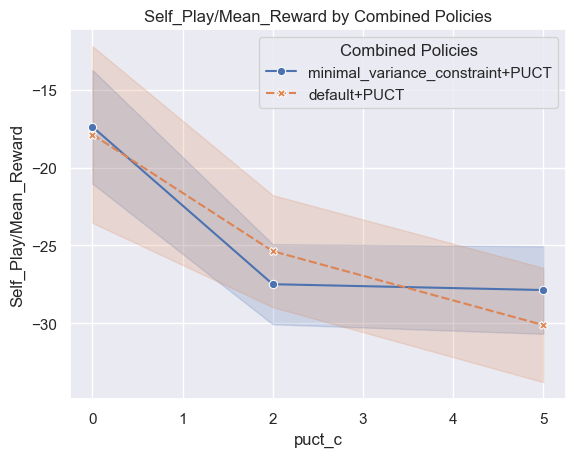

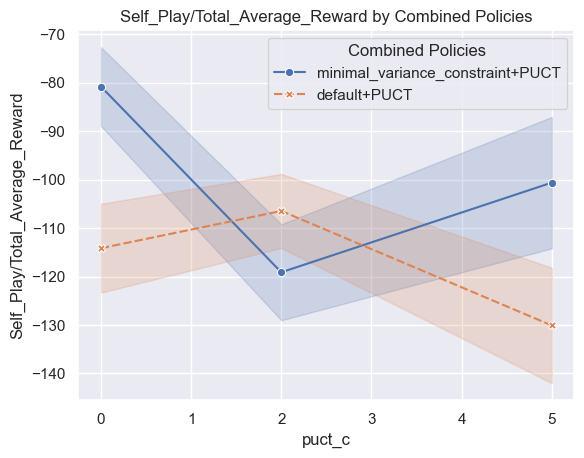

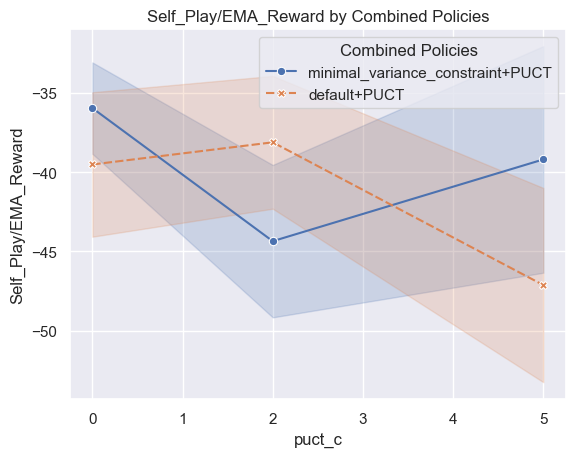

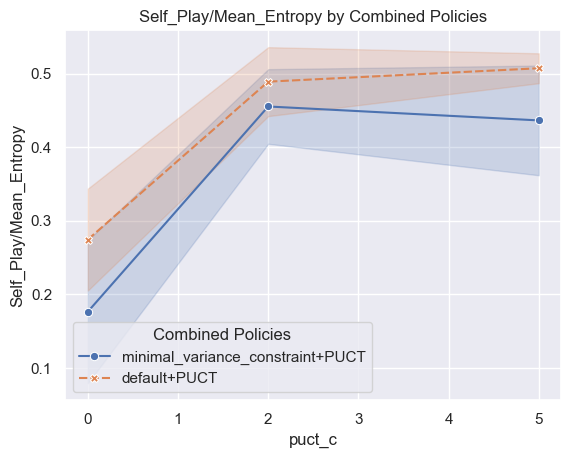

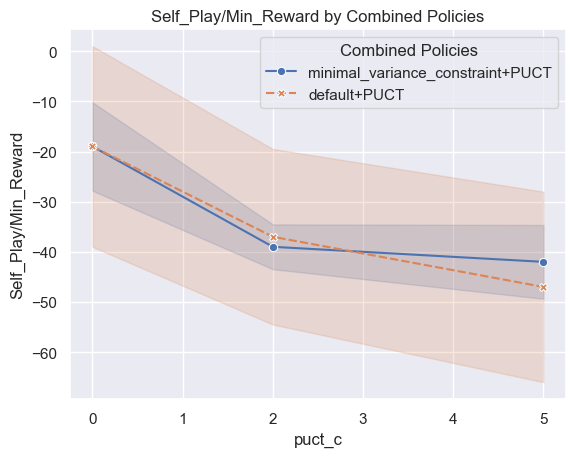

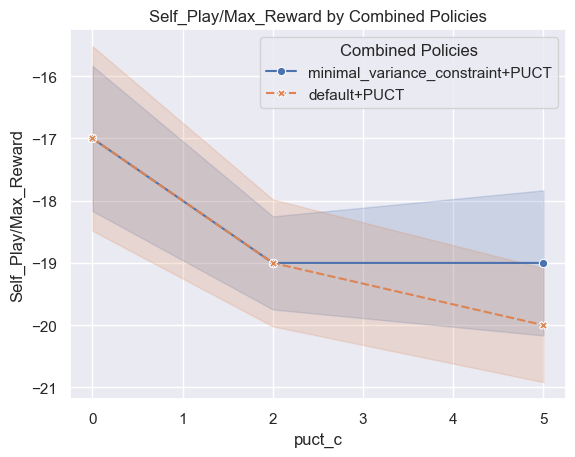

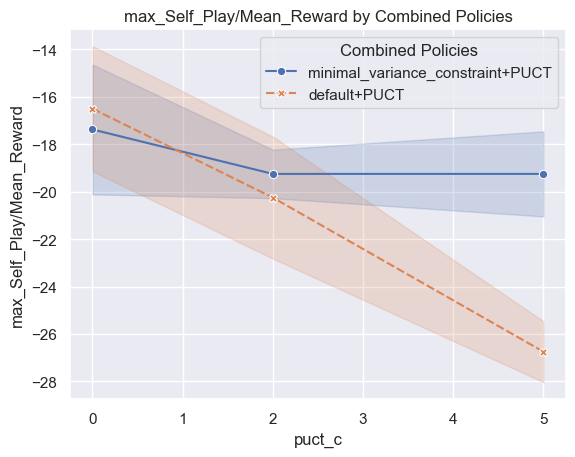

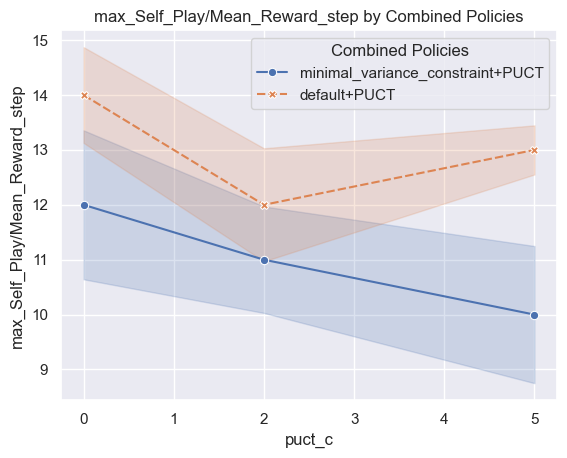

In [15]:


df['policy_combination'] = df['tree_evaluation_policy'] + "+" + df['selection_policy']

metrics = ['Self_Play/Mean_Reward', "Self_Play/Total_Average_Reward", "Self_Play/EMA_Reward", 'Self_Play/Mean_Entropy', 'Self_Play/Min_Reward',
           'Self_Play/Max_Reward',
           'max_Self_Play/Mean_Reward', 'max_Self_Play/Mean_Reward_step'
           ]

for metric in metrics:
    sns.set_theme(style="darkgrid")

    # Create a line plot with confidence intervals
    sns.lineplot(data=df[df['selection_policy'] == 'PUCT'],
                 x=x_metric, y=metric,
                hue="policy_combination", style="policy_combination",
                markers=True, errorbar="se", estimator="median")

    # Customize the plot with titles and labels
    plt.title(f'{metric} by Combined Policies')
    plt.xlabel(x_metric)  # Replace with actual x-axis label
    plt.ylabel(metric)
    plt.legend(title='Combined Policies')
    # plt.gca().set_xscale('log', base=10)

    # Show the plot
    plt.show()
